In [1]:
import sklearn
print(sklearn.__version__)

1.8.0


In [2]:
import sys
print(sys.executable)


C:\Users\princ\ML PROJECTS\Laptop Price Predictor\venv\Scripts\python.exe


In [5]:
import sys
!"{sys.executable}" -m pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\princ\ML PROJECTS\Laptop Price Predictor\venv\Scripts\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('laptop_data.csv')

In [9]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df.shape

(1303, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Cleaning

In [20]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [24]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [26]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float64')

In [28]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


# CHecking imortant Columns wrt Price

In [31]:
import seaborn
print(seaborn.__version__)


0.13.2


C:\Users\princ\AppData\Local\Temp\ipykernel_35288\2229499591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

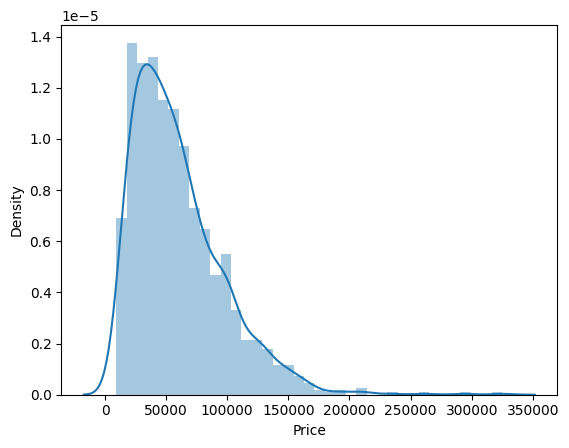

In [32]:
import seaborn as sns
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

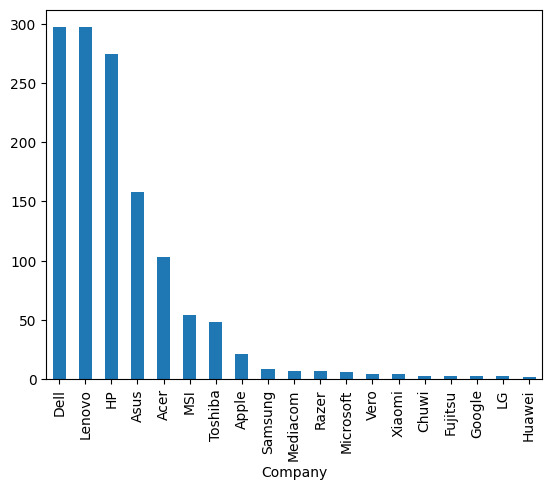

In [33]:
df['Company'].value_counts().plot(kind='bar')

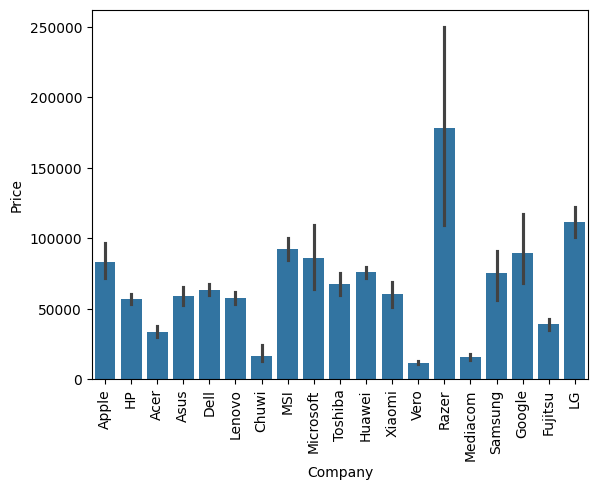

In [34]:
sns.barplot(x=df['Company'],y=df['Price'])
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

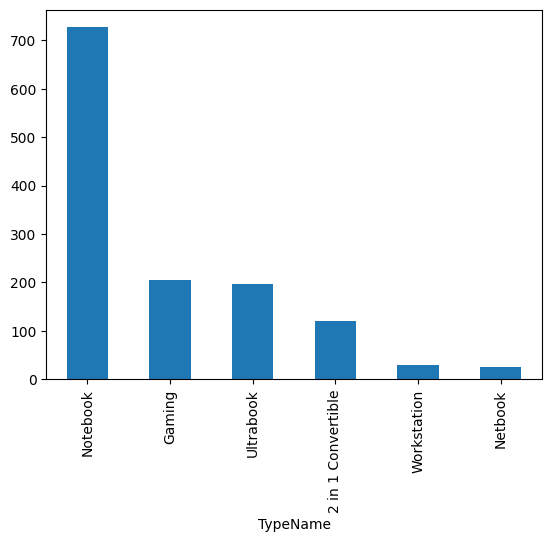

In [35]:
df['TypeName'].value_counts().plot(kind='bar')

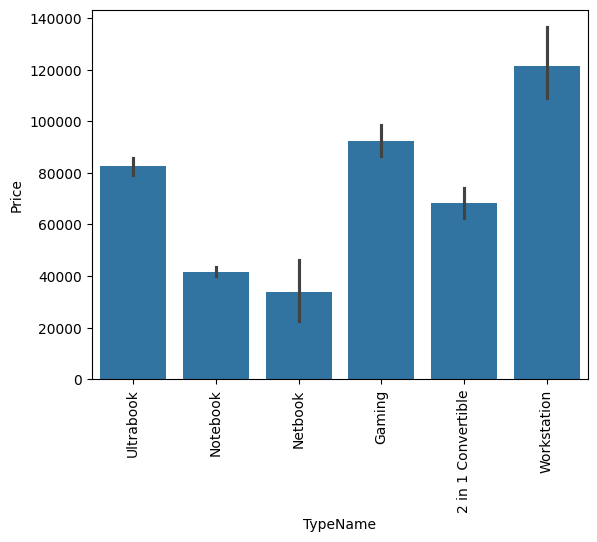

In [36]:
sns.barplot(x=df['TypeName'],y=df['Price'])
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.show()

C:\Users\princ\AppData\Local\Temp\ipykernel_35288\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

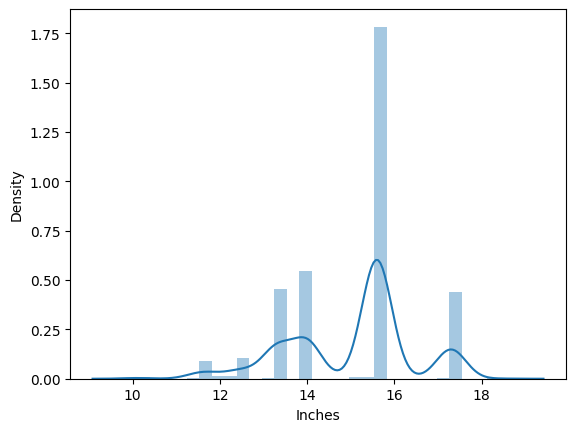

In [37]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

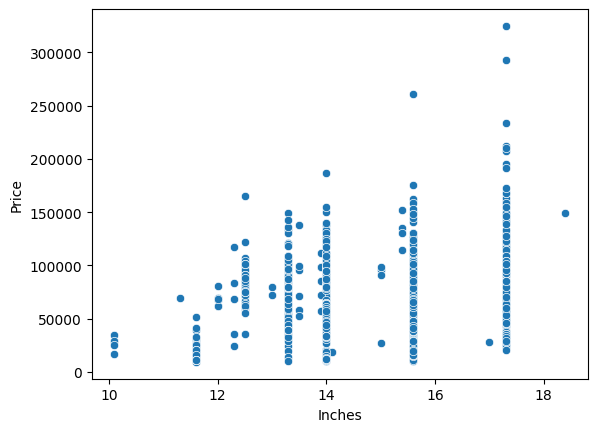

In [38]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [40]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

## Touchscreen Column

In [42]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [43]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,26586.720,0
249,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,108691.200,0
1292,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.120,0
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.264,0
575,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,13266.720,0


<Axes: xlabel='Touchscreen'>

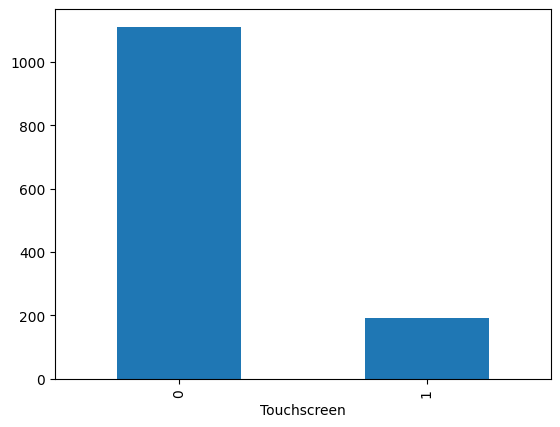

In [44]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

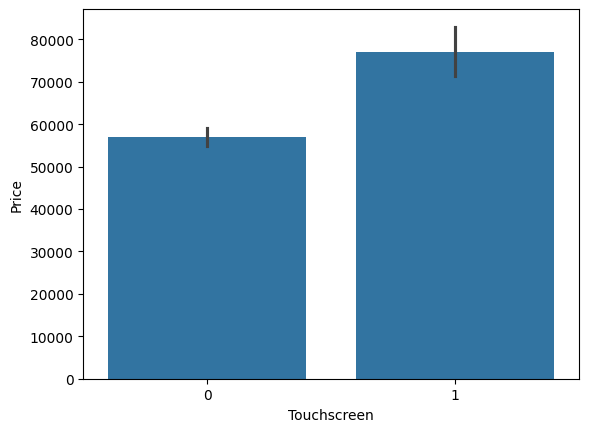

In [46]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

## IPS Column

In [48]:
#checking for ips coumn
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='IPS'>

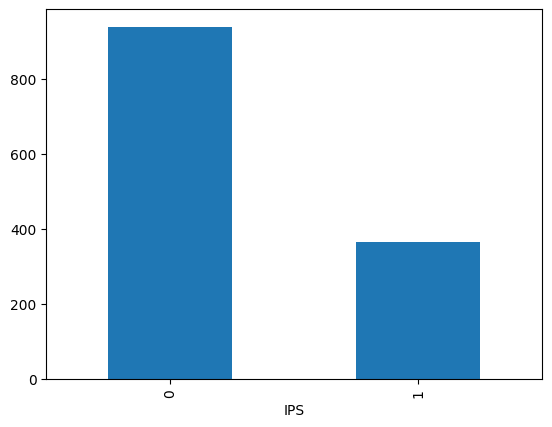

In [49]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

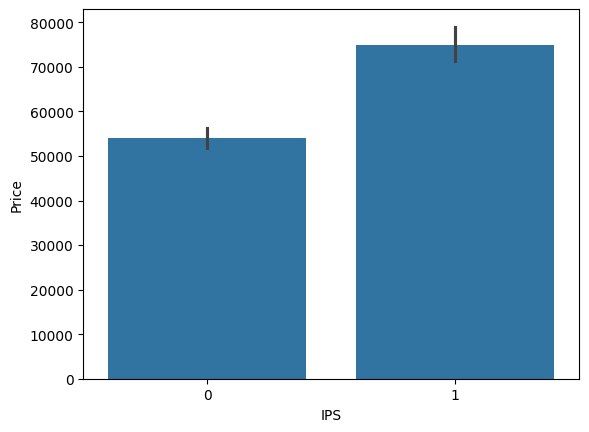

In [51]:
sns.barplot(x=df['IPS'],y=df['Price'])

# X_res,Y_res Column

In [53]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [54]:
df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [55]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [56]:
df['X_res']=new[0]
df['Y_res']=new[1]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [57]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [58]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [59]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


## Calculating PPI

In [61]:
# Select only the numerical columns shown in your .info() output
numerical_df = df[['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'X_res', 'Y_res']]

# Calculate the correlation for the numerical subset
correlation_with_price = numerical_df.corr()['Price']

print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [63]:
df['Inches'][0]

np.float64(13.3)

In [64]:
PPI=[]
for i in range(df.shape[0]):
    
    PPI.append((np.sqrt((df['X_res'][i]*df['X_res'][i])+(df['Y_res'][i]*df['Y_res'][i])))/df['Inches'][i])

In [65]:
df['ppi']=PPI


In [66]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670


# Splitting CPU

In [69]:
df['Cpu'].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [70]:
df['Cpu Name']=df['Cpu'].apply(lambda x:x.split()[0:3])

In [71]:
df.head() 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,"[Intel, Core, i5]"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,"[Intel, Core, i5]"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,"[Intel, Core, i5]"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,"[Intel, Core, i7]"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,"[Intel, Core, i5]"


In [72]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [73]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204,Intel Celeron Dual
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670,Intel Core i7


In [75]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i3' or  text=='Intel Core i5':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        

In [76]:
df['Cpu Brand']=df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu Brand'>

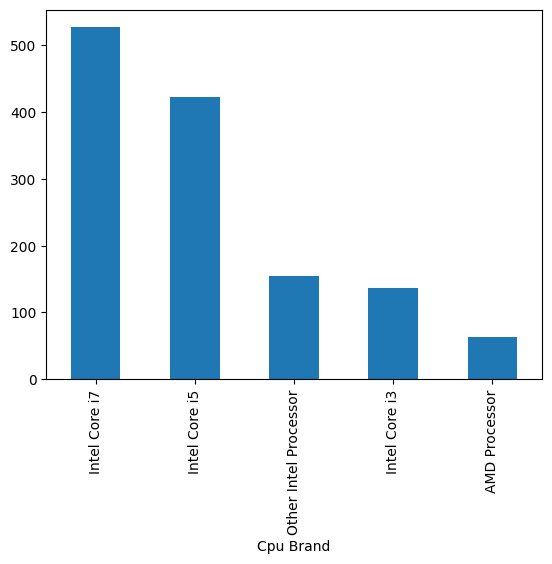

In [77]:
df['Cpu Brand'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

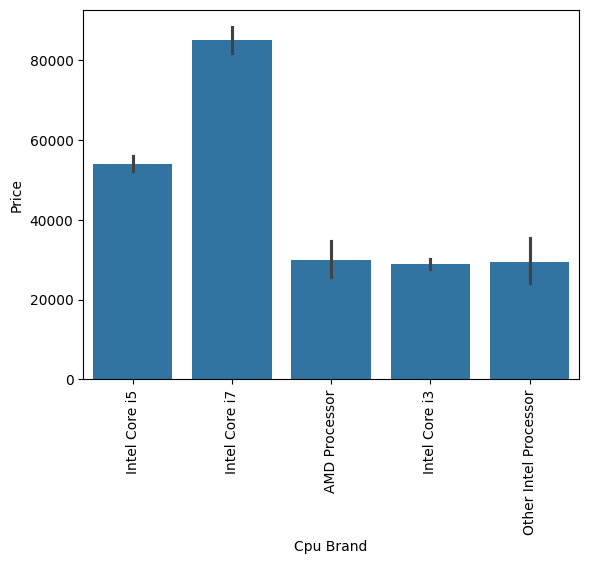

In [78]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram'>

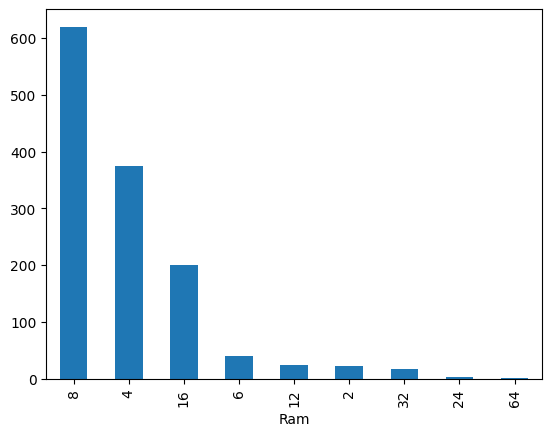

In [80]:
df['Ram'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

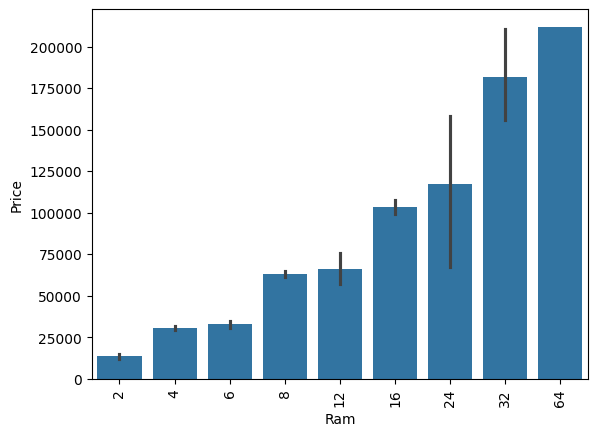

In [81]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')

# Finding SSD,HDD,Hybrid and Flash_Storage from Memory

In [85]:
# Convert to string and clean memory column
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=True)
df['Memory'] = df['Memory'].str.replace('TB', '000', regex=True)

# Split into two parts if '+' is present
new = df['Memory'].str.split('+', n=1, expand=True)

df['first'] = new[0].str.strip()
df['second'] = new[1]

# Layer1 flags
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Keep only digits in first part
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Handle NaN in second part
df['second'].fillna("0", inplace=True)

# Layer2 flags
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Keep only digits in second part
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Replace empty strings with 0 before converting to int
df['first'] = df['first'].replace('', '0')
df['second'] = df['second'].replace('', '0')

# Convert to int safely
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

# Final columns for different storage types
df['HDD'] = (df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=[
    'first', 'second', 
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\princ\AppData\Local\Temp\ipykernel_35288\2796141740.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\princ\AppData\Local\Temp\ipykernel_35288\2796141740.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0", inplace=True)


In [88]:
df.drop(columns=['Memory'],inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  IPS               1303 non-null   int64  
 12  X_res             1303 non-null   int32  
 13  Y_res             1303 non-null   int32  
 14  ppi               1303 non-null   float64
 15  Cpu Name          1303 non-null   object 
 16  Cpu Brand         1303 non-null   object 


In [91]:
# Select only the numerical columns shown in your .info() output
temp = df[['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'X_res', 'Y_res','ppi','HDD','SSD','Hybrid','Flash_Storage']]

# Calculate the correlation for the numerical subset
correlation_with_price = temp.corr()['Price']

print(correlation_with_price)

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
X_res            0.556529
Y_res            0.552809
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [92]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [93]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,256


# GPU Brand Name

In [97]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [99]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [100]:
df.shape

(1303, 20)

In [101]:
df=df[df['Gpu brand']!='ARM']

In [102]:
df.shape

(1302, 20)

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

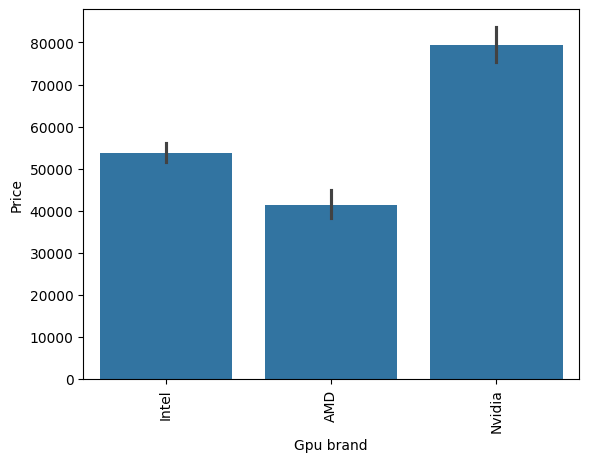

In [104]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')

# OpSys sepration

In [113]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

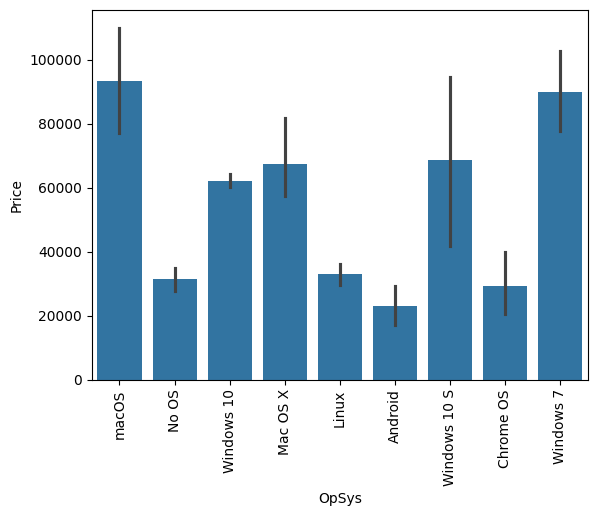

In [114]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [115]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [116]:
df['os']=df['OpSys'].apply(cat_os)

C:\Users\princ\AppData\Local\Temp\ipykernel_35288\3255695950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os']=df['OpSys'].apply(cat_os)


([0, 1, 2],
 [Text(0, 0, 'Mac'), Text(1, 0, 'Others/No OS/Linux'), Text(2, 0, 'Windows')])

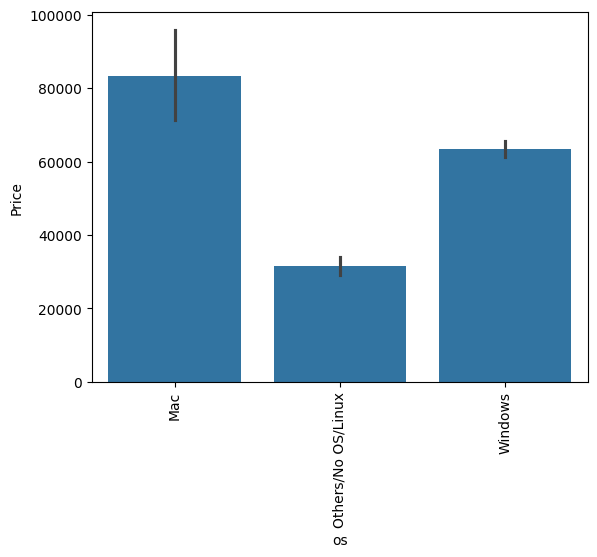

In [117]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')

In [118]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,...,IPS,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac


In [119]:
df.drop(columns=['Inches','ScreenResolution','Cpu','Gpu','OpSys','X_res','Y_res','Cpu Name'],inplace=True)

C:\Users\princ\AppData\Local\Temp\ipykernel_35288\1003485127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Inches','ScreenResolution','Cpu','Gpu','OpSys','X_res','Y_res','Cpu Name'],inplace=True)


In [120]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


<Axes: xlabel='Weight', ylabel='Price'>

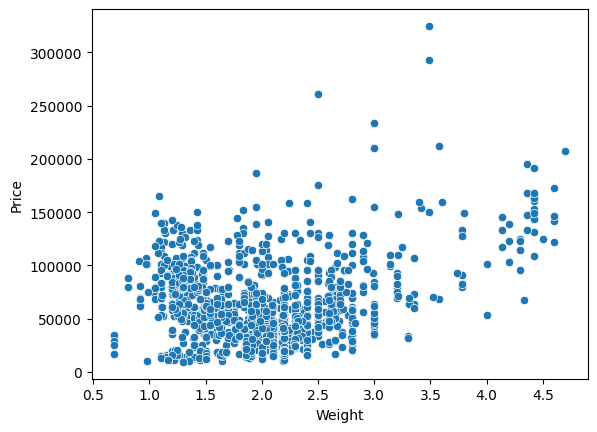

In [121]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu Brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


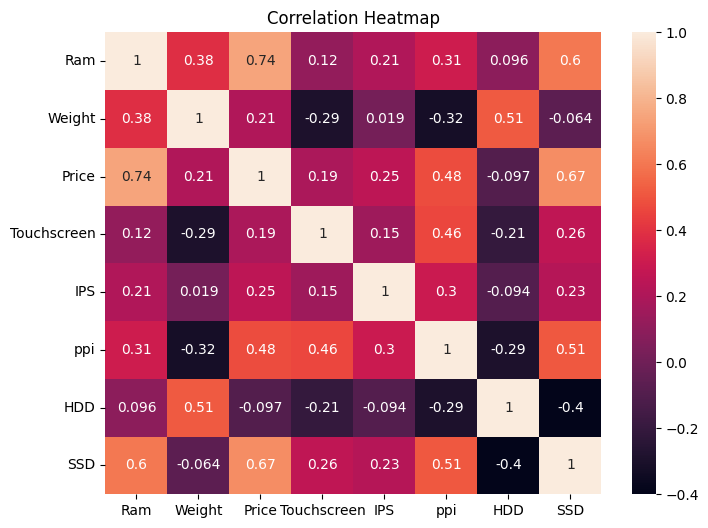

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df[['Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD']]

# Full correlation matrix
corr_matrix = numerical_df.corr()

# Correlation of each feature with Price
correlation_with_price = corr_matrix['Price']
print(correlation_with_price)

# Heatmap of full correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


# Finding Correct Algorithm

C:\Users\princ\AppData\Local\Temp\ipykernel_35288\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

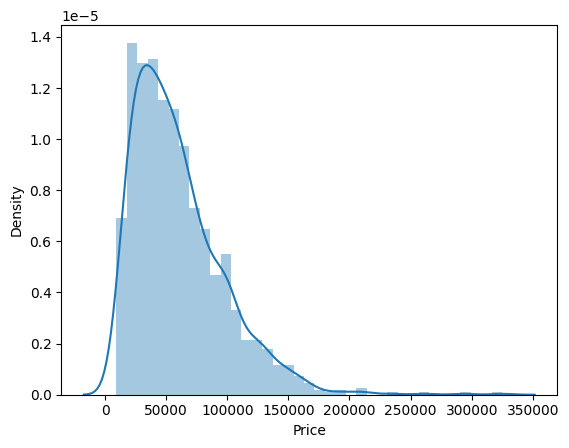

In [125]:
sns.distplot(df['Price'])

C:\Users\princ\AppData\Local\Temp\ipykernel_35288\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

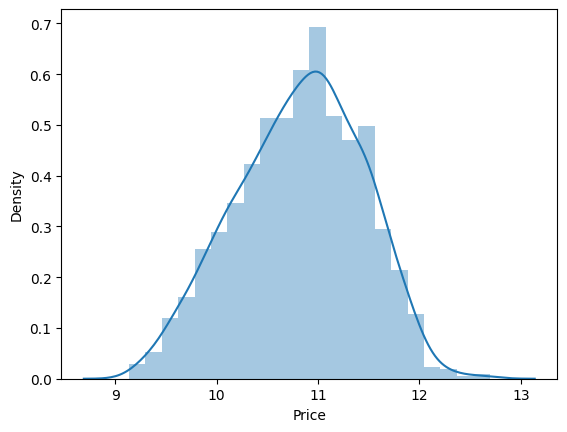

In [126]:
sns.distplot(np.log(df['Price']))

In [127]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [128]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [130]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [132]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [137]:
!pip install xgboost


In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder


from sklearn.metrics import r2_score, mean_absolute_error



# Linear regression

In [145]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8073277450155159
MAE 0.21017827953018972


In [148]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


# Ridge Regression

In [150]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.812733103373946
MAE 0.20926802210371445


# Lasso Regression

In [153]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8071853947620581
MAE 0.21114361575113466


# KNN

In [155]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8030481878603557
MAE 0.19266635529773937


# Decision Tree

In [158]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.833847836973464
MAE 0.18450937726786232


# Random Forest

In [161]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


# Extra Trees

In [163]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8850720167552375
MAE 0.16154538000217084


# Ada BOOST

In [166]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8029853739310276
MAE 0.22313645763265189


# Gradient Boost

In [169]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8826885502569748
MAE 0.15916265272312102


# Xg Boost

In [173]:

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


# Voting Regressor

In [220]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')


rf = RandomForestRegressor(
    n_estimators=350,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=None
)

gbdt = GradientBoostingRegressor(
    n_estimators=100,
    max_features=0.5
)

xgb = XGBRegressor(
    n_estimators=25,
    learning_rate=0.3,
    max_depth=5
)

lr = LinearRegression()

et = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    bootstrap=True,
    max_samples=0.5,
    max_features=0.75,
    max_depth=10
)

# Combine them using Voting Regressor with weights
step2= VotingRegressor(
    estimators=[('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)],
    weights=[5, 1, 1, 1]
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))



R2 score 0.8898501922989476
MAE 0.1578807002493229


# Staking

In [181]:
from sklearn.ensemble import StackingRegressor

#company,typename,cpubrand,gpubrand,os
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')


rf = RandomForestRegressor(
    n_estimators=350,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=None
)

gbdt = GradientBoostingRegressor(
    n_estimators=100,
    max_features=0.5
)

xgb = XGBRegressor(
    n_estimators=25,
    learning_rate=0.3,
    max_depth=5
)

lr = LinearRegression()

et = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    bootstrap=True,
    max_samples=0.5,
    max_features=0.75,
    max_depth=10
)

step2= StackingRegressor(
    estimators=[('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)],
    final_estimator=Ridge(alpha=100)
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))



R2 score 0.8836266487014914
MAE 0.16345510889134873


In [221]:
### Exporting the model
import pickle
pickle.dump(df,open('df.pkl','wb'))


In [224]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [226]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128])

In [228]:
### Exporting the model
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))


In [230]:
import sklearn
print(sklearn.__version__)



1.8.0


In [232]:
import pickle
with open("pipe.pkl", "rb") as f:
    pipe = pickle.load(f)

pipe.predict(X_test[:1])


array([10.72344247])

In [234]:
pipe.predict(X_test[:5])
pipe.score(X_test, y_test)


0.8898501922989476